In [92]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [93]:
train_matrix = np.random.randint(0, 80, size=(10000,64))

In [94]:
scaler = preprocessing.StandardScaler().fit(train_matrix)

In [95]:
X_scaled = scaler.transform(train_matrix)

In [15]:
print(train_matrix[0])
print(train_matrix.shape)

[13 52 66 41 30 24 48  7 65 61 55  8 70 52 43 32 50 30 64 26 29 68 34 71
 17 43 74 53 35  7 42 14 45 37 72  3 18  4 38  3 68 54 69 31  6 59 72 16
 59 16 15 49 56 79 75 77 23 75  1 22 69 74 12 60]
(50000, 64)


In [128]:
outliers = np.random.randint(40,120, size=(2000,64))
inliers = np.random.randint(0,80, size=(2000, 64))
test_matrix =np.concatenate((outliers,inliers), axis=0)

In [129]:
test_matrix_scaled = scaler.transform(test_matrix)

In [121]:
print(test_matrix.shape)
print(test_matrix_scaled[99])

(4000, 64)
[2.14940846 2.31296827 2.16499697 2.19547749 2.06372608 2.42304781
 2.05130783 2.26414741 1.98106695 2.12752876 2.27120252 1.88901171
 2.45104848 2.1120575  2.43587643 2.21554925 2.48537512 1.96257919
 2.49579583 2.18670323 1.83966634 2.11195198 2.04820719 2.57390124
 1.87449562 2.48549077 2.17611585 1.87378568 2.42099595 2.2105503
 2.36986393 1.93803855 2.44477472 2.33059825 2.47648245 1.92912555
 2.51786786 2.28479013 1.88220761 1.79896192 2.1790702  1.93925793
 2.36126744 2.29088314 2.23106366 2.49705979 2.44232186 2.02130908
 2.29046994 2.41658612 2.14661178 1.83798048 2.45210322 2.44409576
 2.62349903 2.52760189 1.91308312 2.10658306 2.43707607 2.08173773
 1.91968296 2.11769856 1.9364178  1.9718546 ]


In [9]:
clf = OneClassSVM()

In [96]:
clf.fit(X_scaled)

OneClassSVM()

In [98]:
scores = clf.score_samples(X_scaled)

In [99]:
print(scores[:5])

[664.36191497 639.7402777  601.42534684 602.49587298 608.71284741]


In [130]:
test_scores = clf.score_samples(test_matrix_scaled)

In [131]:
print(test_scores[:15])

[44.23773993 20.42602291 27.99804219 72.64316    56.67066562 24.98238696
 47.18036773 54.89492013 40.38936819 58.18307893 40.09564246 17.76109075
 30.0585875  13.46785751 30.1329919 ]


In [132]:
y_pred = clf.predict(test_matrix_scaled)

In [115]:
print(y_pred[100])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [124]:
y_true = np.concatenate((np.full(2000, -1), np.full(2000, 1))) # with wrong labels
print(y_true[:10], y_true[-10:])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [1 1 1 1 1 1 1 1 1 1]


In [133]:
fpr, tpr, thresholds = roc_curve(y_true, test_scores)

In [134]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


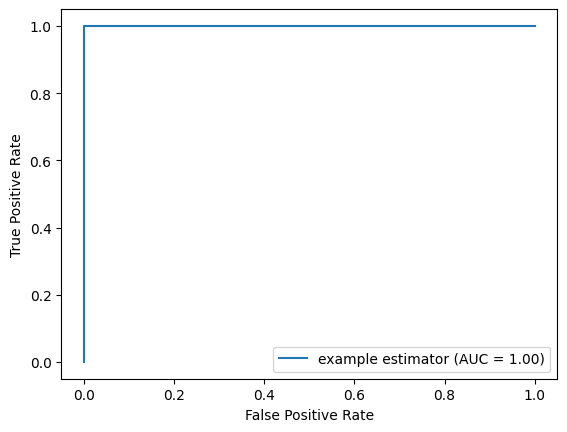

In [135]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [78]:
threshold_index = np.where(fpr > 0)[0][0]
threshold_value = thresholds[threshold_index]
threshold_value

4210.486491504394

In [57]:
train_preds = clf.predict(train_matrix)

[-1  1  1 -1 -1 -1 -1  1  1 -1]


In [60]:
y_true_train = np.full(50000,1)

In [73]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_true_train, scores, pos_label=1)

/Users/Dominik/miniconda3/envs/autoqc/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [76]:
min_train = np.min(scores)
print(min_train)

2079.374745398373


In [75]:
fpr_train

array([nan, nan, nan])

In [74]:
threshold_index_train = np.where(fpr_train > 0)[0][0]
threshold_value_train = thresholds_train[threshold_index_train - 1]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [86]:
predictions_updated = np.where(min_train > test_scores, -1, 1)

In [87]:
fpr_up, tpr_up, thresholds_up = roc_curve(y_true, predictions_updated)

In [89]:
roc_auc_up = auc(fpr_up, tpr_up)
print(roc_auc)

0.33333333333333337


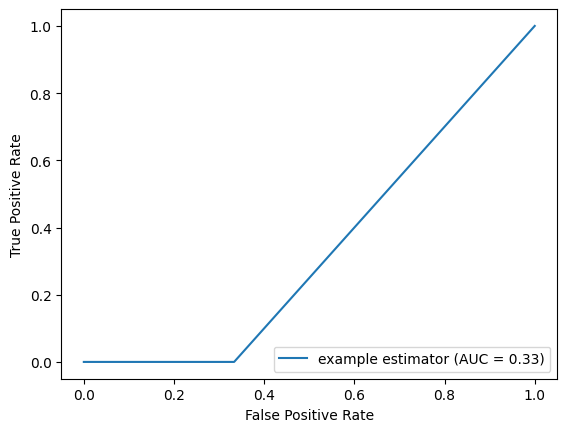

In [90]:
display_up = RocCurveDisplay(fpr=fpr_up, tpr=tpr_up, roc_auc=roc_auc_up,estimator_name='example estimator')
display_up.plot()
plt.show()